<a href="https://colab.research.google.com/github/thetrick/ahk-files/blob/master/linearAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes
Before presentation:
- run code for widgets
- clear output for coding blocks in Programming Vectors section

# Load Libraries and Define Helper Functions

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import ipywidgets as widgets

In [39]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class myArrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)


def vector3d(point,base=(0,0,0),ax=None,arrowstyle="-|>",mutation_scale=50,**kwargs):
    if ax is None:
        ax = plt.gca()
    arrow = myArrow3D(
        [base[0],point[0]],[base[1],point[1]],[base[2],point[2]],
        arrowstyle="-|>",mutation_scale=50,**kwargs
    )
    ax.add_patch(arrow)

def vector2d(point,base=(0,0),ax=None,arrowstyle="-|>",mutation_scale=50,**kwargs):
    if ax is None:
        ax = plt.gca()
    arrow = FancyArrowPatch(base,point,arrowstyle=arrowstyle,mutation_scale=mutation_scale,**kwargs)
    ax.add_patch(arrow)


def plotVector(p,*args,**kwargs):
    if len(p) == 2:
        vector2d(p,*args,**kwargs)
    else:
        vector3d(p,*args,**kwargs)

(0.0, 5.0)

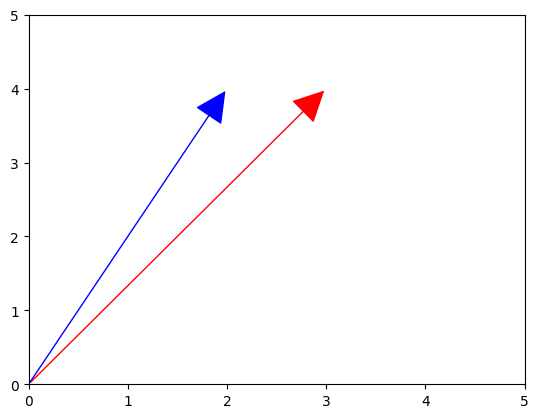

In [40]:
plt.figure()
plotVector((3,4),color='r')
plotVector((2,4),color='b')
plt.xlim((0,5))
plt.ylim((0,5))

(0.0, 6.0)

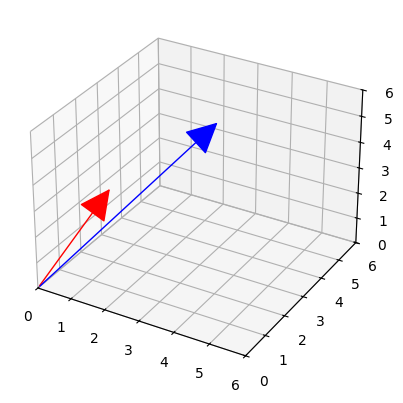

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plotVector((1,2,3),color='r')
plotVector((3,4,5),color='b')
ax.set_xlim((0,6))
ax.set_ylim((0,6))
ax.set_zlim((0,6))

# What is Linear Algebra?

Linear algebra is the study of "linear systems" and "linear equations."

A helpful definition, right?

Let's go through some example scenarios of linear systems and get a sense of how can use them.

## Example 1: The Fruitstand

Imagine that you are sent to the store with \\$30 dollars in your pocket.

You must spend all of the money on groceries.

What combinations of items can you purchase to completely use your budget?

For simplicity, imagine you can purchase fractional groceries.
For example, you can purchase $1\frac{1}{2}$ apples.

To begin, let's imagine a fruit stand that sells the following items:
- apples (\$2 each)
- orange (\$3 each)

Remember, you can buy fractional fruit and you must spend all of your money.

How would you describe this scenario mathematically?

This problem can be written as the following equation:

$$
    \$30 = (\$2\times \color{red}{apples}) + (\$3\times \color{orange}{oranges})
$$

where $\color{red}{apples}$ denotes the number of apples purchased and $\color{orange}{oranges}$ denotes the number of oranges purchased.

That is, the use of $italics$ here means that the word (or, sometimes just a character like $x$) represents some number.

For simplicity, moving forward, we will use
$$
    2\cdot apples
$$
as a shorthand for multiplication.

Also, for simplicity, let's ignore the dollar signs and drop the parentheses.

So, our equation becomes

$$
    30 = 2\cdot \color{red}{apples} + 3\cdot \color{orange}{oranges}
$$

This equation is an example of a **linear equation** which, in general, take the form

$$
    \color{cyan}{y} = \color{blue}{a_1\cdot x_1}\, + \color{green}{a_2\cdot x_2}\, + \color{magenta}{a_3\cdot x_3}\, +\cdots+a_N\cdot x_N
$$
where
- $\color{cyan}{y}$ is your total budget (e.g., in our case $y=30$)
- $\color{blue}{x_1}$ is amount of grocery item type 1 (e.g., $\color{red}{apples}$)
- $\color{green}{x_2}$ is amount of grocery item type 2 (e.g., $\color{orange}{oranges}$)
- and, continuing the pattern, each $x_i$ is some other grocery item type
- $\color{blue}{a_1}$ is the cost of grocery item type 1 (e.g., $a=2$ for $\color{red}{apples}$)
- $\color{green}{a_2}$ is the cost of grocery item type 2 (e.g., $a=3$ for $\color{orange}{oranges}$)
- and so on for $a_i$

Rather than writing out these long equations, we can take advantage of the repeating pattern of the equation to produce a convenient shorthand.

Our linear equation

$$
    \color{cyan}{y} = \color{blue}{a_1\cdot x_1}\, + \color{green}{a_2\cdot x_2}\, + \color{magenta}{a_3\cdot x_3}\, +\cdots+a_N\cdot x_N
$$

can be written as
$$
    \color{cyan}{y} = \sum_{i=1}^{N}a_i\cdot x_i
$$

where $\sum$ is called a "summation."

$$
    30 = 2\cdot \color{red}{apples} + 3\cdot \color{orange}{oranges}
$$

For our equation, how many solutions are there?

Infinitely many! We can see this by rewriting the equation using algebra.

Remember, whatever change you make on one side of the equals sign must also be made to the other side.

$$
    \begin{align}
        30 &= 2\cdot \color{red}{apples} &+ 3\cdot \color{orange}{oranges} \\
        \text{becomes }\hspace{2cm} 30-2\cdot \color{red}{apples} &= &3\cdot  \color{orange}{oranges}\\
        \end{align}
$$  

after subtracting $2\cdot \color{red}{apples}$ from both sides.

And then becomes
$$
     10-\frac{2}{3}\cdot \color{red}{apples} = \color{orange}{oranges}
$$
after dividing both sides by $3$.

$$
    \color{orange}{oranges} = 10-\frac{2}{3}\cdot \color{red}{apples}
$$

From this equation, we see that that number of oranges depends on the number of apples purchased.
This is because we have a fixed budget and we insist on spending the entire budget.

For example, if I purchase 3 apples, then I can use the equation to calculate

$$
    \color{orange}{oranges} = 10-\frac{2}{3}\cdot \color{red}{3} = 10-2 = 8.
$$

That is, if I buy 3 $\color{red}{apples}$ at \\$2 each and 8 $\color{orange}{oranges}$ at \\$3 each, I will have spent \\$30.

$$
    \color{orange}{oranges} = 10-\frac{2}{3}\cdot \color{red}{apples}
$$

This equation is again a **linear equation**.

That is, the relationship between $\color{red}{apples}$ and $\color{orange}{oranges}$ has the form

$$
    y = b + m\cdot x
$$

where $m$ is a number (called the *slope*) and $b$ is a number (called the *intercept*).

In our case, $m=-\frac{2}{3}$ and $b=10$. $m$ tells us how the number of $\color{orange}{oranges}$ will change if I buy an additional $\color{red}{apple}$ and $b$ tells us the number of $\color{orange}{oranges}$ to purchase if no apples are purchased (i.e., $\color{red}{apple}=0$).

What does "linear" really mean here?

If we plot our apples-oranges equation

$$
    \color{orange}{oranges} = 10-\frac{2}{3}\cdot \color{red}{apples}
$$

we get a straight **line**.

In [42]:
"""
%%code
Use ipywidgets to create an interactive visualization.
I want the visualization to plot the -2/3*x + 10 in the positive domain.
I want a slider that moves a point along the line and displays the (x,y) coordinate of the point.
"""
import matplotlib.patches as mpatches

def visualize(apples):
    slider_val = apples
    x = np.linspace(0, 15, 400)
    y = -2/3 * x + 10

    plt.figure(figsize=(8, 6))
    plt.ylim(0, 10)
    plt.xlim(0,15)

    plt.plot(x, y, label='-2/3*x + 10',linewidth=3)

    point_y = -2/3 * slider_val + 10
    point, = plt.plot(slider_val, point_y, 'ro')
    plt.text(slider_val, point_y, "(Apples: %0.1f, Oranges: %0.1f)" % (slider_val,point_y),
             fontsize=12,
            verticalalignment='bottom', horizontalalignment='left')

#     plt.title('Interactive Line Plot')
    plt.xlabel("Number of Apples Purchased",fontsize=15)
    plt.ylabel("Number of Oranges to be Purchased",fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc='upper right',fontsize=15,frameon=False)
#     plt.grid(True)

widgets.interact(visualize, apples=widgets.IntSlider(min=0, max=15, step=1, value=5));

interactive(children=(IntSlider(value=5, description='apples', max=15), Output()), _dom_classes=('widget-inter…

# Example 2: A Grocery Store

This scenario is just like the fruit stand, but let's add one more ingredient.

Let's imagine a grocery store that sells the following items:
- apples (\$2 each)
- bread loaf (\$5 each)
- orange (\$3 each)

Our problem can be written as the following equation:
$$
    30 = 2\cdot \color{red}{apples} + 3\cdot \color{orange}{oranges} + 5\cdot \color{blue}{bread}
$$

Now, if we want to see the relationship between oranges and the other grocery items, we algebraically manipulate both sides of the equation to see

$$
    \color{orange}{oranges} = 10-\frac{2}{3}\color{red}{apples} - \frac{5}{3}\color{blue}{bread}
$$

Like before, we subtract $30$ and $3\cdot \color{orange}{oranges}$ from both sides of the equation, and then divide both sides by $-3$.

Our equation

$$
    \color{orange}{oranges} = 10-\frac{2}{3}\color{red}{apples} - \frac{5}{3}\color{blue}{bread}
$$

is again a **linear equation** of the form

$$
    y = b + \color{red}{a_0\cdot x_0} + \color{blue}{a_1\cdot x_1}
$$

But, this time, the number of $\color{orange}{oranges}$ to buy is shaped by both the number of $\color{red}{apples}$ <u>and</u> the number of $\color{blue}{bread}$ loafs.

$$
    \color{orange}{oranges} = 10-\frac{2}{3}\color{red}{apples} - \frac{5}{3}\color{blue}{bread}
$$

How many solutions are there to this equation?

Again, infinitely many because we allowed for fractional purchases and insist on spending the full budget.

What do those solutions look like?

In [43]:
"""
%%code
Use ipywidgets to make an interactive visualization of the plane defined by $z=(-2/3)*x-(5/3)*y+10$.
The plot should be interactive so that the user can spin the plot in the x, y, and z directions.
"""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from IPython.display import display
import ipywidgets as widgets

def plot_surface(vertical_angle=0.5, horizontal_angle=0.5,):
    fig = plt.figure(figsize=(12,10))
    ax = Axes3D(fig,auto_add_to_figure=False)


    X = np.arange(0, 15, 1)
    Y = np.arange(0, 15, 1)
    X, Y = np.meshgrid(X, Y)
    Z = (-2/3)*X - (5/3)*Y + 10

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Oranges', edgecolor='none')
    ax.view_init(vertical_angle+30, horizontal_angle+30)
    fig.add_axes(ax)
    plt.xlabel("Number of Apples",fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel("Number of Bread Loafs",fontsize=15)
    plt.yticks(fontsize=15)
    ax.set_zlabel("Number of Oranges",fontsize=15)
    ax.tick_params(axis='z', labelsize=15)


print(
    "Here is a 3D plot relating our three variables: Apples, Oranges, and Bread Loafs.\n"+
    "Use the sliders the rotate the plot.\n"+
    "Instead of a line, we see a flat surface called a 'plane.'\n"+
    "Planes are like 2-dimensional versions of lines.\n"+
    "For example, try -40,-30 to the Bread-Orange line.\n\n"
)
widgets.interact(plot_surface, vertical_angle=(-90,90,5), horizontal_angle=(-90,90,5),);

Here is a 3D plot relating our three variables: Apples, Oranges, and Bread Loafs.
Use the sliders the rotate the plot.
Instead of a line, we see a flat surface called a 'plane.'
Planes are like 2-dimensional versions of lines.
For example, try -40,-30 to the Bread-Orange line.




interactive(children=(IntSlider(value=0, description='vertical_angle', max=90, min=-90, step=5), IntSlider(val…

# What are Vectors?

Recall our grocery problem with the equation
$$
    30 = 2\cdot \color{red}{apples} + 3\cdot \color{orange}{oranges} + 5\cdot \color{blue}{bread}
$$

This equation communicates a few key things:
- the total budget (\$30),
- the number of each grocery item ($\color{red}{apples},\, \color{orange}{oranges},\, \color{blue}{bread}$),
- and the price of each grocery item ($\$2,\, \$3,\, \$5$).

Vectors give us yet another way to separate and represent this information as points in a high-dimensional space.

Let's focus on the prices for the grocery items:
- apples (\$2 each)
- orange (\$3 each)
- bread loaf (\$5 each)

We have been treating these prices as fixed, but they could change! We need a flexible way to represent this information.

Another way to encode these prices is in an ordered list where
- the first list component represents the cost of apples,
- the second component represents the cost of oranges,
- and the third component represents the cost of bread.

Using the price list above, we could write the **cost vector** $\vec{c}=\begin{bmatrix}
2 \\
3 \\
5 \\
\end{bmatrix}$

From the fruit stand example,
$\vec{c}=\begin{bmatrix}
2 \\
3 \\
\end{bmatrix}$ highlights a specific point in 2-dimensional space (i.e., in the apple-orange cost space).

It's common to use an arrow to represent vectors.

In [44]:
"""
%%code
Use ipywidgets to create an interactive visualization.
I want the visualization to plot the -2/3*x + 10 in the positive domain.
I want a slider that moves a point along the line and displays the (x,y) coordinate of the point.
"""
import matplotlib.patches as mpatches

def visualize(apples):
    slider_val = apples
    x = np.linspace(0, 15, 400)
    y = -2/3 * x + 10

    plt.figure(figsize=(8, 6))
    plt.ylim(0, 10)
    plt.xlim(0,15)

    plt.plot(x, y, label='-2/3*x + 10',linewidth=3)

    point_y = -2/3 * slider_val + 10
    point, = plt.plot(slider_val, point_y, 'ro')
    plotVector((slider_val,point_y),color='r',label="$\\vec{c}$")
    plt.text(slider_val, point_y, "(Apples: %0.1f, Oranges: %0.1f)" % (slider_val,point_y),
             fontsize=12,
            verticalalignment='bottom', horizontalalignment='left')

    plt.xlabel("Number of Apples Purchased",fontsize=15)
    plt.ylabel("Number of Oranges to be Purchased",fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc='upper right',fontsize=15,frameon=False)


widgets.interact(visualize, apples=widgets.IntSlider(min=0, max=15, step=1, value=5));

interactive(children=(IntSlider(value=5, description='apples', max=15), Output()), _dom_classes=('widget-inter…

For the grocery example,
$\vec{c}=\begin{bmatrix}
2 \\
3 \\
5 \\
\end{bmatrix}$ highlights a specific point in 3-dimensional space (i.e., in the apple-orange-bread cost space).

In [45]:
"""
%%code
Use ipywidgets to create a visualization of a vector in 3-D space.
The widget should have a slider indicating the vector component for each of the x, y, and z dimensions.
"""
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# define a function to update the vector
def plot_vector(apples, oranges, bread):
    x,y,z = apples,oranges,bread
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    plotVector((x,y,z),ax=ax,color='b')
    plt.plot(x,y,z,'ro',markersize=10)
    plt.plot(x,0,0,'r^',markersize=10,alpha=.3)
    plt.plot(10,y,0,'r^',markersize=10,alpha=.3)
    plt.plot(10,10,z,'r^',markersize=10,alpha=.3)
    plt.gca().text(x,y,z,"(%d,%d,%d)" % (x,y,z),fontsize=15)
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.set_zlim([0, 10])
    plt.xlabel("Number Apples",fontsize=15)
    plt.ylabel("Number Oranges",fontsize=15)
    plt.gca().set_zlabel("Number Bread Loafs",fontsize=15)

widgets.interact(plot_vector, apples=(0,10,1), oranges=(0,10,1),bread=(0,10,1));

interactive(children=(IntSlider(value=5, description='apples', max=10), IntSlider(value=5, description='orange…

For example, maybe the grocery updates their prices by add $\$1$ to each price. We can communicate this by writing a new cost vector, $\vec{c}_2$, according to:
$$
    \vec{c}_2 = \vec{c}+1 =
    \begin{bmatrix}
        2 \\
        3 \\
     \end{bmatrix} + 1 =
     \begin{bmatrix}
        3 \\
        4 \\
         \end{bmatrix}.
$$

Notice that each component in the original vector $\vec{c}$ has increased by 1.

In [46]:
def add_to_vector(add_to_c):
    c = np.array([2,3])
    c2 = c + add_to_c
    plt.figure()
    plotVector(c,color='r')
    plt.text(.7,2,"$\\vec{c}$",color='r',fontsize=30)
    plotVector(c2,color='b')
    plt.text(2,1.5,"$\\vec{c}+%d$" % add_to_c,color='b',fontsize=30)
    plt.xlim((0,8))
    plt.ylim((0,8))
    plt.xlabel("Apple Cost (\$)",fontsize=15)
    plt.ylabel("Orange Cost (\$)",fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)


widgets.interact(add_to_vector, add_to_c=(0,5,1));

interactive(children=(IntSlider(value=2, description='add_to_c', max=5), Output()), _dom_classes=('widget-inte…

You can also add vectors together.

For example, if $\vec{a}=\begin{bmatrix} 2 \\ 3 \\ \end{bmatrix}$ and $\vec{b}=\begin{bmatrix} 1 \\ 2 \\ \end{bmatrix}$, then
$$
    \vec{a}+\vec{b} = \begin{bmatrix} 2+1 \\ 3+2 \\ \end{bmatrix} = \begin{bmatrix} 3 \\ 5 \\ \end{bmatrix}
$$

Similarly, you can subtract vectors by subtracting componentwise:
$$
    \vec{a}-\vec{b} = \begin{bmatrix} 2-1 \\ 3-2 \\ \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}
$$

Use the demo to play with adding vectors.

In [47]:
def addVectors(angle_a,norm_a,angle_b,norm_b):
    rads = lambda degrees: 2*np.pi*degrees/360
    angle_a = rads(angle_a)
    angle_b = rads(angle_b)
    a = norm_a*np.array([np.cos(angle_a),np.sin(angle_a)])
    b = norm_b*np.array([np.cos(angle_b),np.sin(angle_b)])
    c = a+b

    plt.figure(figsize=(8,6))
    plotVector(a,color='r',label="$\\vec{a}$")
    plotVector(b,color='b',label="$\\vec{b}$")
    plotVector(c,color='magenta',label="$\\vec{a}+\\vec{b}$")
    plotVector(c,a,color='b',label="$\\hat{\\vec{b}}$",alpha=.4)
    plt.text(a[0],a[1],"$\\vec{a}=(%0.2f,%0.2f)$" % tuple(a),ha="right",fontsize=15,color='r')
    plt.text(b[0],b[1],"$\\vec{b}=(%0.2f,%0.2f)$" % tuple(b),ha="left",fontsize=15,color='b')
    plt.text(c[0],c[1],"$\\vec{a}+\\vec{b}=(%0.2f,%0.2f)$" % tuple(c),ha="left",fontsize=15,color='m')
    d = a+.5*b
    plt.text(d[0],d[1],"$\\vec{b}$ copy",ha="right",fontsize=15,color='b',alpha=.4)

    plt.xlim((0,5))
    plt.ylim((0,5))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

# addVectors(45,2,15,3)
widgets.interact(
    addVectors,
    angle_a = (0,90,5),
    norm_a = (0,3,.2),
    angle_b = (0,90,5),
    norm_b = (0,3,.2),
);

interactive(children=(IntSlider(value=45, description='angle_a', max=90, step=5), FloatSlider(value=1.0, descr…

What about subtracting vectors?

In [48]:
def subtractVectors(angle_a,norm_a,angle_b,norm_b):
    rads = lambda degrees: 2*np.pi*degrees/360
    angle_a = rads(angle_a)
    angle_b = rads(angle_b)
    a = norm_a*np.array([np.cos(angle_a),np.sin(angle_a)])
    b = norm_b*np.array([np.cos(angle_b),np.sin(angle_b)])
    c = a-b

    plt.figure(figsize=(8,6))
    plt.plot([-5,5],[0,0],'-',color="gray")
    plt.plot([0,0],[-5,5],'-',color="gray")
    plotVector(a,color='r',label="$\\vec{a}$")
    plotVector(b,color='b',label="$\\vec{b}$")
    plotVector(c,color='magenta',label="$\\vec{a}+\\vec{b}$")
    plotVector(a,c,color='b',label="$\\hat{\\vec{b}}$",alpha=.4)
    plt.text(a[0],a[1],"$\\vec{a}=(%0.2f,%0.2f)$" % tuple(a),ha="right",fontsize=15,color='r')
    plt.text(b[0],b[1],"$\\vec{b}=(%0.2f,%0.2f)$" % tuple(b),ha="left",fontsize=15,color='b')
    plt.text(c[0],c[1],"$\\vec{a}+\\vec{b}=(%0.2f,%0.2f)$" % tuple(c),ha="left",fontsize=15,color='m')
    d = a+.5*b
    plt.text(d[0],d[1],"$\\vec{b}$ copy",ha="right",fontsize=15,color='b',alpha=.4)


    plt.xlim((-5,5))
    plt.ylim((-5,5))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

# subtractVectors(45,2,15,3)
widgets.interact(
    subtractVectors,
    angle_a = (-90,90,5),
    norm_a = (0,3,.2),
    angle_b = (-90,90,5),
    norm_b = (0,3,.2),
);

interactive(children=(IntSlider(value=0, description='angle_a', max=90, min=-90, step=5), FloatSlider(value=1.…

Let's use another vector, $\vec{g}$, to represent the number of each grocery item

For example,
$
     \vec{g} = \begin{bmatrix}
        4 \\
        2 \\
        3 \\
     \end{bmatrix}
$
indicates that we purcahsed 4 apples, 2 oranges, and 3 loafs of bread.

What if we triple our purchase of each item?

$$
     \vec{g}_2 = 3\cdot\vec{g} = 3\cdot\begin{bmatrix}
        4 \\
        2 \\
        3 \\
     \end{bmatrix} =
     \begin{bmatrix}
        12 \\
        6 \\
        9 \\
     \end{bmatrix}.
$$

Notice that each component has been multiplied by 3.

To avoid confusion later, we may say that $\vec{g}$ was <u>scaled</u> by the **scalar** 3 instead of "multiplied."
We will see that "multiplication" has contextually-dependent meaning when vectors are involved.

Here is a visualization to explain scaling a vector.

**Scaling** a vector changes the length of the distance from the origin (0,0) to the end point of the vector.

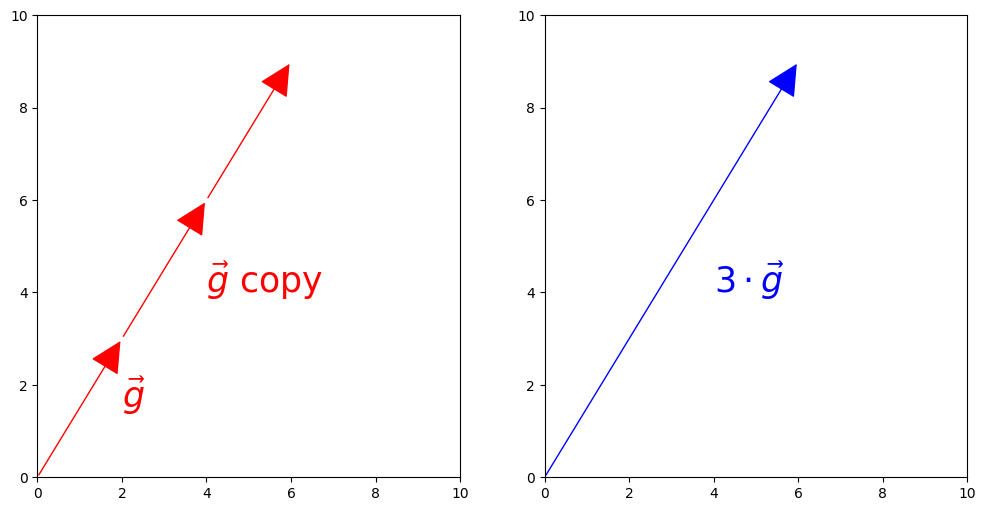

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g = np.array([2,3])
plotVector(g,color='r')
plotVector(2*g,g,color='r')
plotVector(3*g,2*g,color='r')
plt.text(2,1.5,"$\\vec{g}$",fontsize=25,color='r')
plt.text(4,4,"$\\vec{g}$ copy",fontsize=25,color='r')
plt.xlim((0,10))
plt.ylim((0,10))
plt.subplot(1,2,2)
plotVector(3*g,color='b')
plt.text(4,4,"$3\\cdot\\vec{g}$",fontsize=25,color='b')
plt.xlim((0,10))
plt.ylim((0,10));

Here is another interactive view on rescaling $\vec{g}$.

In [50]:
def scale_vector(scalar):
    c = np.array([2,3])
    c2 = c * scalar
    plt.figure(figsize=(8,6))
    plotVector(c,color='r')
    plt.text(.7,2,"$\\vec{g}$",color='r',fontsize=30)
    plotVector(c2,color='b')
    plt.text(2,1.5,"$%0.1f\\cdot\\vec{g}$" % scalar,color='b',fontsize=30)
    plt.xlim((0,8))
    plt.ylim((0,8))
    plt.xlabel("Apples",fontsize=15)
    plt.ylabel("Oranges",fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)


widgets.interact(scale_vector, scalar=(0,3,.2));

interactive(children=(FloatSlider(value=1.0, description='scalar', max=3.0, step=0.2), Output()), _dom_classes…

# A Physicist Intro to Vectors

Physicists love vectors and linear algrebra because they provide a concise way to encode high-dimensional information.

In physics, a vector is anything that has a **direction** and a **length**.

For example, you can use a vector $\vec{p}$ to encode a base ball's position as it's thrown.

In [51]:
"""
%%code
Use ipywidgets to create an interactive visualization of a ball's trajectory as it's thrown.
Use a slider to move the ball through its trajectory.
The visualization should include a vector from the origin to the ball's position.
"""
# first, define the trajectory function of the ball
def trajectory(t, v0, angle):
    g = 9.8  # gravity
    angle = np.radians(angle)  # convert angle to radians
    x = v0 * np.cos(angle) * t
    y = v0 * np.sin(angle) * t - 0.5 * g * t**2
    return x, y

# then, define the function for drawing the trajectory and vector on the plot
def draw_trajectory(t=0, ):
    v0=5; angle=45
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    x, y = trajectory(t, v0, angle)
    plt.scatter(x,y,s=200,facecolor='w',edgecolor='k')

    # plot the trajectory
    t_values = np.linspace(0, t, num=300)
    x_values, y_values = trajectory(t_values, v0, angle)
    ax.plot(x_values, y_values, 'b--')

    # plot the vector
    plotVector((x,y),color='gray',zorder=5,linewidth=4)
    plt.text(x+.03,y+.03,"$\\vec{p}=(%0.2f,\\, %0.2f)$" % (x,y),fontsize=15,color='gray')

    ax.set_xlabel('X',fontsize=15)
    ax.set_ylabel('Y',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim((-.5,2.6))
    plt.ylim((-.1,.7))
    plt.plot(plt.xlim(),[0,0],'k-',linewidth=2)
    plt.plot([0,0],plt.ylim(),'k-',linewidth=2)
    ax.set_title('Trajectory of a thrown ball')
    plt.grid(True)

# finally, use ipywidgets to make the plot interactive
widgets.interact(draw_trajectory,
                 t=widgets.FloatSlider(value=0, min=0, max=.7, step=0.05),
#                  v0=widgets.FloatSlider(value=5, min=1, max=20, step=0.1),
#                  angle=widgets.FloatSlider(value=45, min=0, max=90, step=1)
                );

interactive(children=(FloatSlider(value=0.0, description='t', max=0.7, step=0.05), Output()), _dom_classes=('w…

The direction of the ball from the origin is encodeded $\vec{p}=\begin{bmatrix} p1 \\ p2\\ \end{bmatrix}$.

$p_1$ is the distance in the $x$ direction (horizontal) and $p_2$ is the distance in the $y$ direction (vertical).

With these distances, we can calculate the ball's distance from where it was thrown according to
$$
    ||\vec{p}|| = \sqrt{p_1^2 + p_2^2}
$$

In linear algebra, a vector's length (or "magnitude"), $\,||\cdot||\,$, is called the vector's <u>norm</u>.

$||\vec{p}||$ is a number.

If $\vec{p}$ has more than two dimensions, then you calculate
$$
    ||\vec{p}|| = \sqrt{p_1^2+p_2^2 + \cdots +p_N^2}
$$

This equation is derived from the Pythagorean Theorem for identifying the length of a right triangles hypotenuse ($c$) from the length of the triangle's base ($a$) and the triangle's height ($b$):
$$
    a^2+b^2 = c^2 \hspace{1cm}\Rightarrow\hspace{1cm} c = \sqrt{a^2+b^2}.
$$

In [52]:
"""
%%code
Use ipywidgets to create an interactive visualization of a ball's trajectory as it's thrown.
Use a slider to move the ball through its trajectory.
The visualization should include a vector from the origin to the ball's position.
"""
# first, define the trajectory function of the ball
def trajectory(t, v0, angle):
    g = 9.8  # gravity
    angle = np.radians(angle)  # convert angle to radians
    x = v0 * np.cos(angle) * t
    y = v0 * np.sin(angle) * t - 0.5 * g * t**2
    return x, y

# then, define the function for drawing the trajectory and vector on the plot
def draw_trajectory(t=0,):
    v0=5; angle=45
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    x, y = trajectory(t, v0, angle)
    plt.scatter(x,y,s=200,facecolor='w',edgecolor='k')

    # plot the trajectory
    t_values = np.linspace(0, t, num=300)
    x_values, y_values = trajectory(t_values, v0, angle)
    ax.plot(x_values, y_values, 'b--')

    # plot the vector
    plotVector((x,y),color='gray',zorder=5,linewidth=4)
    plt.text(x+.03,y+.03,"$\\vec{p}=(%0.2f,\\, %0.2f)$" % (x,y),fontsize=15,color='gray')

    # plot triangle
    if t > 0:
        plt.plot([0,x],[0,y],'-',color="darkorange",linewidth=3,zorder=5)
        plt.plot([0,x],[0,0],'-',color="darkorange",linewidth=3,zorder=5)
        plt.plot([x,x],[0,y],'-',color="darkorange",linewidth=3,zorder=5)
        plt.text(.5*x,-.05,"$a$",color="darkorange",fontsize=25)
        plt.text(x+.1,.5*y,"$b$",color="darkorange",fontsize=25)
        plt.text(.5*x,.7*y,"$c$",color="darkorange",fontsize=25)

    ax.set_xlabel('X',fontsize=15)
    ax.set_ylabel('Y',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim((-.5,2.6))
    plt.ylim((-.1,.7))
    plt.plot(plt.xlim(),[0,0],'k-',linewidth=2)
    plt.plot([0,0],plt.ylim(),'k-',linewidth=2)
    ax.set_title('Trajectory of a thrown ball')
    plt.grid(True)

# finally, use ipywidgets to make the plot interactive
widgets.interact(draw_trajectory,
                 t=widgets.FloatSlider(value=0, min=0, max=.7, step=0.05),
#                  v0=widgets.FloatSlider(value=5, min=1, max=20, step=0.1),
#                  angle=widgets.FloatSlider(value=45, min=0, max=90, step=1)
                );

interactive(children=(FloatSlider(value=0.0, description='t', max=0.7, step=0.05), Output()), _dom_classes=('w…

# Vector Dot Products

Recall our grocery problem with the equation
$$
    30 = 2\cdot \color{red}{apples} + 3\cdot \color{orange}{oranges} + 5\cdot \color{blue}{bread}
$$

Vectors give us yet another way to separate and represent this information as points in a high-dimensional space.

The vector $\vec{g}$ encodes the amount of each grocery item while vector $\vec{c}$ encodes the cost of each item.

But can we combine $\vec{g}$ and $\vec{c}$ to replace the equation?

The equation is multiplying each vector's components and then summing those products.

This type of operation happens so often that we call it a "vector dot product" and denote it with the notation
$$
    \vec{c}\cdot\vec{g} = \sum_{i=1}^N c_i \cdot g_i
$$
where $c_i$ is the $i$th component of the vector (same for $g_i$).

Now, we can save space and rewrite our equation as $$30 = \vec{c}\cdot\vec{g}$$

$$
    \vec{c}\cdot\vec{g} = \sum_{i=1}^N c_i \cdot g_i
$$
where $c_i$ is the $i$th component of the vector (same for $g_i$).

Note that $\,\cdot\,$  means two different things depending on if we are operating on vectors or vector components.

For vector components, we are just multiplying two numbers.

This double usage of notation is confusing. Maybe a more natural "vector multiplication" would produce a new vector from multiplying each component of $\vec{c}$ and $\vec{g}$.

This is ANOTHER type of vector multiplication called "elementwise multiplication" and we write it as
$$
    \vec{c}*\vec{g} =
    \begin{bmatrix}
        c_1\cdot g_1 \\
        c_2\cdot g_2 \\
        c_3\cdot g_3 \\
    \end{bmatrix}
$$

Use the sliders to define the vectors
$\,\vec{a}=\begin{bmatrix} a1 \\ a2 \\ \end{bmatrix}\,$ and
$\,\vec{b}=\begin{bmatrix} b1 \\ b2 \\ \end{bmatrix}\,$

In [53]:
def visualizeElementProduct(a1,a2,b1,b2):
    a = np.array([a1,a2])
    b = np.array([b1,b2])
    ab = a*b
    plt.figure(figsize=(8,6))
    plotVector(a,color='r',label="$\\vec{a}$")
    plt.text(a1,a2,"$\\vec{a}=(%0.1f,%0.1f)$" % (a1,a2),color='r',fontsize=15)
    plotVector(b,color='b',label="$\\vec{b}$")
    plt.text(b1,b2,"$\\vec{b}=(%0.1f,%0.1f)$" % (b1,b2),color='b',fontsize=15)
    plotVector(ab,color='k',label="$\\vec{a}*\\vec{b}$")
    plt.text(ab[0],ab[1],"$\\vec{a}*\\vec{b}=(%0.1f,%0.1f)$" % (ab[0],ab[1]),color='k',fontsize=15)
    plt.legend(fontsize=20,frameon=False)
    plt.xlim((0,5))
    plt.ylim((0,5))
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)

widgets.interact(
    visualizeElementProduct,
    a1=(0,3,.2),
    a2=(0,3,.2),
    b1=(0,3,.2),
    b2=(0,3,.2),
);

interactive(children=(FloatSlider(value=1.0, description='a1', max=3.0, step=0.2), FloatSlider(value=1.0, desc…

### Visually, what is happening when we take a vector dot product?

There is a relationship between $\,\vec{c}\cdot\vec{g}\,$ and $\,\vec{c}*\vec{g}\,$.

The dot product
$
   \text{    }\vec{c}\cdot\vec{g} = \displaystyle\sum_{i=1}^N c_i \cdot g_i \text{    }
$
is the sum of the elementwise products.

Notationally, we will say $ \vec{c}\cdot\vec{g} = |\vec{c}*\vec{g}|$


Use the sliders to define the vectors
$\,\vec{a}=\begin{bmatrix} a1 \\ a2 \\ \end{bmatrix}\,$ and
$\,\vec{b}=\begin{bmatrix} b1 \\ b2 \\ \end{bmatrix}\,$

In [54]:
def visualizeDotProduct(a1,a2,b1,b2):
    a = np.array([a1,a2])
    b = np.array([b1,b2])
    ab = a*b
    plt.figure(figsize=(8,6))
    plotVector(a,color='r',label="$||\\vec{a}|| = %0.4f$" % np.linalg.norm(a))
    plt.text(a1,a2,"$\\vec{a}=(%0.1f,%0.1f)$" % (a1,a2),color='r',fontsize=15)
    plotVector(b,color='b',label="$||\\vec{b}|| = %0.4f$" % np.linalg.norm(b))
    plt.text(b1,b2,"$\\vec{b}=(%0.1f,%0.1f)$" % (b1,b2),color='b',fontsize=15)
    plotVector(ab,color='k',label="$\\vec{a}\\cdot\\vec{b}=|\\vec{a}*\\vec{b}| = %0.4f$" % np.sum(ab))
    plt.text(ab[0],ab[1],"$\\vec{a}*\\vec{b}=(%0.1f,%0.1f)$" % (ab[0],ab[1]),color='k',fontsize=15)
    plt.legend(fontsize=20,frameon=False)
    plt.xlim((0,5))
    plt.ylim((0,5))
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)

widgets.interact(
    visualizeDotProduct,
    a1=(0,3,.2),
    a2=(0,3,.2),
    b1=(0,3,.2),
    b2=(0,3,.2),
);

interactive(children=(FloatSlider(value=1.0, description='a1', max=3.0, step=0.2), FloatSlider(value=1.0, desc…

Another approach uses the angle between the vectors:

$$
    \vec{a}\cdot\vec{b} =\,\mid\mid\vec{a}\mid\mid\cdot\mid\mid\vec{b}\mid\mid\cdot\cos\left(\theta\right)
$$

where $\theta$ is the angle between $\vec{a}$ and $\vec{b}$.

Remember that $\cos\left(\theta\right)$ represents the size of the angle horizontally across from the 90 degree angle in a right triangle.

This interpretation is like saying: "How much of $\vec{a}$ is aligned with $\vec{b}$?"

In the demo, try
- $\theta_a=0$ and $\theta_b=90$ when vectors have no alignment
- $\theta_a=\theta_b$ so that vectors have perfect alignment

In [55]:
def visualizeDotProduct2(angle_a,norma,angle_b,normb):
#     angle1,angle2,length1,length2 = angle_a,angle_b,length_a,length_b
    angle1,angle2 = angle_a,angle_b
    length1,length2 = norma,normb

    a = length1*np.array([np.sin(2*np.pi*angle1/360),np.cos(2*np.pi*angle1/360)])
    b = length2*np.array([np.sin(2*np.pi*angle2/360),np.cos(2*np.pi*angle2/360)])
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(b)
#     ab = a*b
    plt.figure(figsize=(8,6))
    plt.gca().set_aspect("equal")

    plotVector(a,color='r',label="$||\\vec{a}|| = %0.4f$" % norma)
    plt.text(a[0],a[1],"$\\vec{a}=(%0.1f,%0.1f)$" % (a[0],a[1]),color='r',fontsize=15)
    plotVector(b,color='b',label="$||\\vec{b}|| = %0.4f$" % normb)
    plt.text(b[0],b[1],"$\\vec{b}=(%0.1f,%0.1f)$" % (b[0],b[1]),color='b',fontsize=15)

#     plt.text(ab[0],ab[1],"$\\vec{a}*\\vec{b}=(%0.1f,%0.1f)$" % (ab[0],ab[1]),color='k',fontsize=15)
    plt.legend(fontsize=20,frameon=False)

    # plot angle
    theta = np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))
    theta1 = 360*np.arccos(b[0]/normb)/(2*np.pi)
    theta2 = 360*np.arccos(a[0]/norma)/(2*np.pi)
    arc = matplotlib.patches.Arc((0,0),1,1,theta1=theta1,theta2=theta2,linewidth=2)
    plt.gca().add_patch(arc)
    theta3 = theta1 + .5*(theta2-theta1)
    theta3 = 2*np.pi*theta3/360
    plt.text(.5*np.cos(theta3),.5*np.sin(theta3),"$\\theta$",fontsize=20)

    plt.title("$\\cos\\left(\\theta\\right)=%0.2f$,     $\\vec{a}\\cdot\\vec{b}=||\\vec{a}||\\cdot||\\vec{b}||\\cdot\\cos\\left(\\theta\\right) = %0.4f$" % \
              (np.cos(theta),np.dot(a,b)),fontsize=15)

    plt.xlim((0,5))
    plt.ylim((0,5))
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)



widgets.interact(
    visualizeDotProduct2,
    angle_a=(0,90,5),
    norma = (0,3,.2),
#     length_a=(0,3,.2),
    angle_b=(0,90,5),
#     length_b=(0,3,.2),
    normb = (0,3,.2),
);

interactive(children=(IntSlider(value=45, description='angle_a', max=90, step=5), FloatSlider(value=1.0, descr…

## Python Programming with Vectors

In [56]:
# Python lists are a natural candidate for representing vectors
# Here are some examples of vectors as Python lists
a = [1,2,3,4]
b = list(range(6,10))
print(a)
print(b)

[1, 2, 3, 4]
[6, 7, 8, 9]


In [57]:
# vector operations on lists
# e.g., vector addition..... a similar approach for subtraction, multiplication, division
import math
c = []
for i in range(len(a)):
    c.append(a[i]+b[i])
print(c)

# vector dot product
c = 0.0
for i in range(len(a)):
    c += a[i]*b[i]
print(c)

# vector norm
c = 0.0
for aa in a:
    c += aa**2
c = math.sqrt(c)
print(c)

[7, 9, 11, 13]
80.0
5.477225575051661


Python lists are fine for representing vectors, but they provide two big problems:
- vector operations require a lot of code!
- for high-dimensional vectors (i.e., long lists) the runtime gets very long

In [58]:
# Fortunately, there is a widely used linear algebra Python package that can help.
# Numpy (often abbreviated to np) takes advantage of "vectorized computation" to
# abstract away the need for for-loops and drastically accelerates computation.
import numpy as np

a = np.array([1,2,3,4])
b = np.arange(6,10)
print(type(a))
print(a)
print(b)

<class 'numpy.ndarray'>
[1 2 3 4]
[6 7 8 9]


In [59]:
# here is what vector operations look like on Numpy arrays.
# Look at how much less code is required!

# e.g., vector addition..... a similar approach works for subtraction, multiplication, division
c = a+b
print(c)

# vector dot product
c = np.dot(a,b)
print(c)

# vector norm using Numpy's Linear Algebra Library
c = np.linalg.norm(a)
print(c)

[ 7  9 11 13]
80
5.477225575051661


In [60]:
# let's compare runtimes for adding two large vectors using Python lists or Numpy arrays.
def addListVectors(a,b):
    c = []
    for i in range(len(a)):
        c.append(a[i]+b[i])
    return c

list_a = list(range(10**6))
list_b = list(range(10**6))


def addNumpyVectors(a,b):
    return a + b

numpy_a = np.arange(10**6)
numpy_b = np.arange(10**6)

In [61]:
%timeit addListVectors(list_a,list_b)

116 ms ± 25.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [62]:
%timeit addNumpyVectors(numpy_a,numpy_b)

2.36 ms ± 55.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


A millisecond (ms) is one thousandth (1/1000) of a second.

A microsecond ($\mu$s) is one millionth (1/1,000,000) of a second.

# What are Matrices?

A **matrix** is a set of rows of vectors or columns of vectors.

Matrices might represent data or functions depending on their use case.

When matrices are used to represent functions, then those functions are called **linear maps** or **linear systems of equations**.

$$
    M=\begin{bmatrix}
    a_1 & b_1 & c_1 & d_1\\
    a_2 & b_2 & c_2 & d_2\\
    a_3 & b_3 & c_3 & d_3
    \end{bmatrix}
    = \begin{bmatrix}
        \vdots & \vdots & \vdots & \vdots \\
        \vec{a} & \vec{b} & \vec{c} & \vec{d} \\
        \vdots & \vdots & \vdots & \vdots \\
      \end{bmatrix}
$$

The example matrix $M$ is comprised of 4 column vectors each containing 3 components.
So we will say the $M$ has dimensions $3\times4$.

$M$ is a 2-dimensional matrix, but matrices can be higher dimensional in general.
Higher dimensional matrices can be thought of as matrices containing lower dimensional matrices.
These are sometimes called **tensors** in machine learning.

Note the vectors are 1-dimensionl matrices.

## Matrices as Data

A matrix can be used to represent data.

For example, a Portable Network Graphic image file (or PNG for short) is a matrix containing a grid of colors that make the image.

Here is an example image in Python.

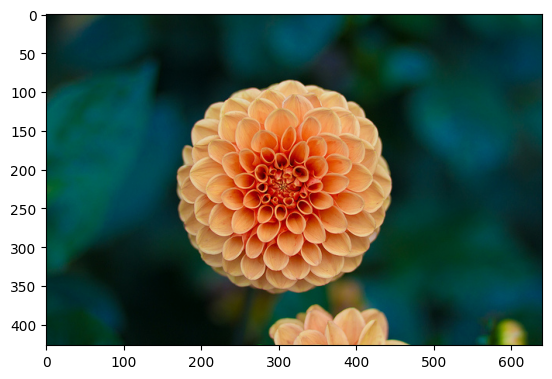

In [63]:
from sklearn import datasets
flower = np.array(datasets.load_sample_image('flower.jpg').data)
plt.imshow(flower);

In [64]:
print("What are the flower matrix dimensions? " + str(flower.shape))
print("\nIt's 3-dimensional. The first two dimensions represent the X-Y coordinates of image pixels.")
print("\nThe 3rd dimension represents the pixel color.\nThe 3rd dimension has length-3 because colors are represented as RGB values.")
print("\nHere are some slices of the flower matrix:")
print("First layer (red values out of 255):")
print(flower[:4,:4,0])
print("Second layer (green values out of 255):")
print(flower[:4,:4,1])

What are the flower matrix dimensions? (427, 640, 3)

It's 3-dimensional. The first two dimensions represent the X-Y coordinates of image pixels.

The 3rd dimension represents the pixel color.
The 3rd dimension has length-3 because colors are represented as RGB values.

Here are some slices of the flower matrix:
First layer (red values out of 255):
[[2 3 7 8]
 [1 3 7 8]
 [2 6 7 7]
 [3 7 7 5]]
Second layer (green values out of 255):
[[19 18 20 21]
 [18 18 20 21]
 [17 19 20 20]
 [18 20 20 20]]


## Matrices as Functions

A matrix can represent linear transformations of other matrices.

In this case, the matrix represents a function.

Representing functions as matrices can both accelerate computation and enable intuitive explanations for how the function works.

For example, the rotation matrix

$$
    R\left(\theta\right) = \begin{bmatrix}
        \cos\left(\theta\right) & -\sin\left(\theta\right) \\
        \sin\left(\theta\right) & \cos\left(\theta\right) \\
        \end{bmatrix}
$$

will "rotate" another 2-dimensional matrix by angle $\theta$.

But, to see this, we need to define an operation describing how one matrix "acts" on another.

### Matrix Multiplication

As with vectors, matrix operations include componentwise addition ($+$), subtraction ($-$), and multiplication ($*$).

But, we will say that a matrix $M$ "acts" on matrix $N$ when we take their **matrix multiplication** or **matrix dot product**.

Let consider as vectors the rows of
$
    M=\begin{bmatrix}
        \color{red}{m_{11}} & \color{red}{m_{12}} & \color{red}{m_{13}} \\
        \color{blue}{m_{21}} & \color{blue}{m_{22}} & \color{blue}{m_{23}} \\
        \color{orange}{m_{31}} & \color{orange}{m_{32}} & \color{orange}{m_{33}} \\
       \end{bmatrix} =
       \begin{bmatrix}
           \color{red}{\cdots} & \color{red}{\vec{m_1}} & \color{red}{\cdots}\\
           \color{blue}{\cdots} & \color{blue}{\vec{m_2}} & \color{blue}{\cdots}\\
           \color{orange}{\cdots} & \color{orange}{\vec{m_3}} & \color{orange}{\cdots}\\
       \end{bmatrix}
$ and the columns of
$
    N=\begin{bmatrix}
        \color{green}{n_{11}} & \color{darkmagenta}{n_{12}} & \color{peru}{n_{13}} \\
        \color{green}{n_{21}} & \color{darkmagenta}{n_{22}} & \color{peru}{n_{23}} \\
        \color{green}{n_{31}} & \color{darkmagenta}{n_{32}} & \color{peru}{n_{33}} \\
       \end{bmatrix}
       = \begin{bmatrix}
           \color{green}{\vdots} & \color{darkmagenta}{\vdots} & \color{peru}{\vdots} \\
           \color{green}{\vec{n_1}} & \color{darkmagenta}{\vec{n_2}} & \color{peru}{\vec{n_3}} \\
           \color{green}{\vdots} & \color{darkmagenta}{\vdots} & \color{peru}{\vdots} \\
       \end{bmatrix}
$

The dot product of $M$ and $N$ is the vector dot product of each row of $M$ with each column of $N$:
$$
    M\cdot N = \begin{bmatrix}
        \color{red}{\vec{m_1}}\cdot\color{green}{\vec{n_1}} &
        \color{red}{\vec{m_1}}\cdot\color{darkmagenta}{\vec{n_2}} &
        \color{red}{\vec{m_1}}\cdot\color{peru}{\vec{n_3}} \\
        \color{blue}{\vec{m_2}}\cdot\color{green}{\vec{n_1}} &
        \color{blue}{\vec{m_2}}\cdot\color{darkmagenta}{\vec{n_2}} &
        \color{blue}{\vec{m_2}}\cdot\color{peru}{\vec{n_3}} \\
        \color{orange}{\vec{m_3}}\cdot\color{green}{\vec{n_1}} &
        \color{orange}{\vec{m_3}}\cdot\color{darkmagenta}{\vec{n_2}} &
        \color{orange}{\vec{m_3}}\cdot\color{peru}{\vec{n_3}} \\
       \end{bmatrix}
$$

$M$ and $N$ were both 3x3 matrices in this example.

But, in general, you need only that the 2nd dimension of $M$ matches the first dimension of $N$.

For example, the rotation matrix, $R\left(\theta\right) = \begin{bmatrix}
        \cos\left(\theta\right) & -\sin\left(\theta\right) \\
        \sin\left(\theta\right) & \cos\left(\theta\right) \\
        \end{bmatrix}
$, is a 2x2 matrix that can act on another 2x$n$ matrix.

This second matrix might represent a the x-y coordinates of points in a scatter plot:
$$
    P = \begin{bmatrix}
        x_1 & x_2 & \cdots & x_n \\
        y_1 & y_2 & \cdots & y_n \\
    \end{bmatrix}
$$

Then, given an angle $\theta$, we can rotate $P$ using $R(\theta)\cdot P$.

In this example, $P$ represents the x-y points of a scatter plot (maybe you recognize the shape!)

Use the slider the change $\theta$ and rotate the scatter plot.

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
P = np.loadtxt("/content/drive/MyDrive/cmpinf2105/Datasaurus_data.csv",delimiter=",").T

R = lambda theta: np.array([[np.cos(theta),-np.sin(theta)],
                           [np.sin(theta),np.cos(theta)]])

def rotate(theta,M):
    return np.dot(R(theta),M)

def dinoPlot(theta=0):
    plt.figure(figsize=(12,10))
    plt.gca().set_aspect("equal")
#     plt.gca().set_grid(True)
    plt.grid()
    p = rotate(theta,P)
    plt.plot([0,0],[-120,120],'k-')
    plt.plot([-120,120],[0,0],'k-')
    plt.plot(p[0,:],p[1,:],'o')
    plt.xlim((-120,120))
    plt.ylim((-120,120))

widgets.interact(dinoPlot,theta=(0,2*np.pi,2*np.pi/100));

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, step=0.06283185307179…

Matrices can also represent functions that **stretch** or **shrink** points.

For example, $M=\begin{bmatrix} a & 0 \\ 0 & a \\ \end{bmatrix}$ will act on another matrix by rescaling points' distance from the origin by a factor of $a$.

In [67]:
def rescaleDino(a=1):
    M = np.array([[a,0],
                 [0,a]])
    p = np.dot(M,P)
    plt.figure()
    plt.grid("on")
    plt.plot([0,0],[-200,200],'k-')
    plt.plot([-200,200],[0,0],'k-')
    plt.plot(p[0,:],p[1,:],'o')
    plt.xlim((-200,200))
    plt.ylim((-200,200))

widgets.interact(rescaleDino,a=(-2,2,.2));

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0, step=0.2), Output()), _dom_cl…

Finally, matrices can shrink one dimension by a factor of $a$ and stretch another dimension by a factor of $b$.

This is called a **shear**. The following matrix shears horizontally by a factor of $a$ and vertically by a factor of $b$.

For example, the matrix
$
M=\begin{bmatrix} 1 & a \\ 0 & 1 \\ \end{bmatrix} \cdot
    \begin{bmatrix} 1 & 0 \\ b & 1 \\ \end{bmatrix}
 = \begin{bmatrix} 1+a\cdot b & a \\ b& 1 \\ \end{bmatrix}
 $

In [68]:
def shearDino(a=0,b=0):
    M = np.array([[1+a*b,a],
                 [b,1]])
    V = 100*np.array([[1,0],[0,1]])
    p = np.dot(M,P)
    v = np.dot(M,V)
    plt.figure()
    plt.grid("on")
    plt.gca().set_aspect("equal")
    plt.plot([0,0],[0,200],'k-')
#     plt.plot([0,200],[0,0],'k-')
    plt.plot(p[0,:],p[1,:],'o')
    plotVector(v[:,0],color='r')
    plotVector(v[:,1],color='b')
    plt.xlim((-100,200))
    plt.ylim((0,200))

widgets.interact(shearDino,a=(-2,2,.1),b=(-1,2,.2));

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## Eigenvectors & Eigenvalues

It is often important to know which vectors have their directions unchanged by a linear transformation.

Consider the shear example from before and remember that each choice of $a$ and $b$ defines a different matrix
$
M=\begin{bmatrix} 1 & a \\ 0 & 1 \\ \end{bmatrix} \cdot
    \begin{bmatrix} 1 & 0 \\ b & 1 \\ \end{bmatrix}
 = \begin{bmatrix} 1+a\cdot b & a \\ b& 1 \\ \end{bmatrix}
$

From the visualization, we can see that the <font color='blue'>blue vector</font> does not rotate when we vary $b$.

In [69]:
def shearDino(a=0,b=0):
    M = np.array([[1+a*b,a],
                 [b,1]])
    V = 100*np.array([[1,0],[0,1]])
    p = np.dot(M,P)
    v = np.dot(M,V)
    plt.figure()
    plt.grid("on")
    plt.gca().set_aspect("equal")
    plt.plot([0,0],[0,200],'k-')
#     plt.plot([0,200],[0,0],'k-')
    plt.plot(p[0,:],p[1,:],'o')
    plotVector(v[:,0],color='r')
    plotVector(v[:,1],color='b')
    plt.xlim((-100,200))
    plt.ylim((0,200))

widgets.interact(shearDino,a=(-2,2,.1),b=(-1,2,.2));

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

Vector $\vec{v}$ is an **eigenvector** of $M$ if $\vec{v}$ does not rotate when $M$ acts on it; the eigenvector only shrinks or grows along its original direction.

Put another way: $\hspace{1cm}M\cdot\vec{v} = \lambda\cdot\vec{v}\hspace{1cm}$ where $\lambda$ is some number.

$\lambda$ represents the amount of shrinking or growing that happens to $\vec{v}$ when $M$ acts on $\vec{v}$.

We call $\lambda$ the corresponding **eigenvalue** to the eigenvector $\vec{v}$.

Certain types of matrices yield eigenvectors with useful properties.

For example, a matrix is **symmetric** if the top right triangle of the matrix is a mirror image of the lower left triangle.

Here is a symmetric 4-by-4 matrix

$
    M = \begin{bmatrix}
        a & \color{red}{b} & \color{blue}{c} & \color{green}{d} \\
        \color{red}{b} & a & \color{orange}{e} & \color{darkmagenta}{f} \\
        \color{blue}{c} & \color{orange}{e} & a & \color{cyan}{g} \\
        \color{green}{d} & \color{darkmagenta}{f} & \color{cyan}{g} & a \\  
    \end{bmatrix}
$

A symmetric $n$-by-$n$ matrix $M$ will have $n$ unique eigenvectors and they will all be mutually perpendicular to each other.

That means if $\vec{v}_1$ and $\vec{v}_2$ are two different eigenvectors of $M$, then they are oriented 90 degrees from each other.

Put another way, $\hspace{1cm}\vec{v}_1\cdot\vec{v}_2 = 0$

The whole set of $M$'s eigenvectors $\hspace{1cm}\vec{v}_1,\, \vec{v}_2,\,\dots,\,\vec{v}_n\hspace{1cm}$ effectively define a new coordinate system like the typical x-y plane but rotated.

This new coordinate system is called $M$'s **eigenspace**.

<i>But this may not be true if $M$ is not symmetric!</i>

## Finding Eigenvalues and Eigenvectors

Remember, $\vec{v}$ is an eigenvector of matrix $M$ if

$M\cdot\vec{v}=\lambda\cdot\vec{v}$

in which case $\lambda$ is the scalar eigenvalue corresponding to $\vec{v}$.

A $n$-by-$n$ matrix $M$ will have $n$ eigenvectors

$\vec{v}_1,\, \vec{v}_2,\,\dots,\,\vec{v}_n$

and $n$ corresponding eigenvalues

$\lambda_1,\,\lambda_2,\,\dots,\,\lambda_n$.

How do we find all of these eigenvectors and eigenvalues?

Our strategy is to find eigenvalues and then use the eigenvalues to find the corresponding eigenvectors.

But first, we will use a special kind of matrix called the **identity matrix** denoted $I$.

$I$ is a $n$-by-$n$ matrix with 1's along the main diagnol from the top-left to the bottom-right, and 0's elsewhere.

$
    I = \begin{bmatrix}
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1\\
    \end{bmatrix}
$

Note that $\hspace{1cm}M\cdot I = M\hspace{1cm}$ which is why $I$ is called an "identity."

From before, $\hspace{1cm}\vec{v}$ is an eigenvector of matrix $M$ if

$M\cdot\vec{v}=\lambda\cdot\vec{v}$

So, subtracting $M\cdot\vec{v}$ from both sides yields

$\vec{0} = \lambda\vec{v}- M\vec{v} = \vec{v}\left(\lambda I - M\right)$

where $\vec{0}$ is a vector of zeros.

Assuming $\vec{v}\neq\vec{0}$, then it must be that $\left(\lambda I - M\right)$ is somehow equal to zero, but even this is strange since this equation should yield a matrix.

$\lambda I - M$ is somehow equal to zero, but it need not be equal to a matrix filled with zeros.

Instead, we need to know if $M$ as a function stretches the x-y plane in a way that shrinks the space so that its area is 0.

This is weird to think about. But remember how the shearing example warped the x and y reference vectors.

To see this effect, for simplicity, let's assume $M$ and $I$ are 2-by-2 matrices.

What happens when $M=\begin{bmatrix} a & b \\ c & d \\ \end{bmatrix}$ acts on the points of the unit square?

Let $S = \begin{bmatrix}
            0 & 0 & 1 & 1 \\
            0 & 1 & 1 & 0 \\
        \end{bmatrix}$ represent the corners of the unit square.

$
    M\cdot S =
        \begin{bmatrix} a & b \\ c & d \\ \end{bmatrix}
        \cdot
        \begin{bmatrix}
            0 & 0 & 1 & 1 \\
            0 & 1 & 1 & 0 \\
        \end{bmatrix}
        =
        \begin{bmatrix}
            0 & b & a+b & a \\
            0 & d & c+d & c \\
        \end{bmatrix}
$

The unit square becomes a parallelogram and the area of the parallelogram is what interests us.

There are several choices of $a,\, b,\, c,\, d$ that produce a parallelogram with area zero.

With some work, you can show that the area of one of these parallelograms is $ad-bc$.

$$
M=\begin{bmatrix} a & b \\ c & d \\ \end{bmatrix},\hspace{2cm}S = \begin{bmatrix}
            0 & 0 & 1 & 1 \\
            0 & 1 & 1 & 0 \\
        \end{bmatrix}
$$

In [70]:
# import matplotlib as mpl

# mpl.rcParams['font.size'] = 20
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
def transformSquare(a=1,b=0,c=0,d=1):
    sq = np.array([[0,0],[0,1],[1,1],[1,0]])
    M = np.array([[a,b],[c,d],])
    sq2 = np.dot(M,sq.T).T

    plt.figure(figsize=(8,6))
    plt.gca().set_aspect("equal")
    plt.plot([0,0],[-3,6],'k-')
    plt.plot([-3,6],[0,0],'k-')
    plt.fill(sq2[:,0],sq2[:,1],color='cadetblue')
#     plt.plot(sq2[:,0],sq2[:,1],'-',color='cadetblue',linewidth=3)
#     plt.plot([sq2[-1,0],0],[sq2[-1,1],0],'-',color='cadetblue',linewidth=3)
    plt.title("Parallelogram Area: $ad-bc=(%0.1f)(%0.1f)-(%0.1f)(%0.1f) = %0.2f$" % (a,d,b,c,a*d-b*c),fontsize=15,
             color="cadetblue")
#     for i in range(sq2.shape[0]):
#         x,y = sq2[i,0],sq2[i,1]
#         plt.text(x,y,"(%0.2f,%0.2f)" % (x,y),ha="left",va="bottom",fontsize=12)
    plt.text(sq2[0,0],sq2[0,1],"(%0.1f,%0.1f)" % (sq2[0,0],sq2[0,1]),ha="left",va="bottom",fontsize=12)
    plt.text(sq2[1,0],sq2[1,1],"(b,d)=(%0.1f,%0.1f)" % (sq2[1,0],sq2[1,1]),ha="left",va="bottom",fontsize=12,
            rotation=35)
    plt.text(sq2[2,0],sq2[2,1],"(a+b,c+d)=(%0.1f,%0.1f)" % (sq2[2,0],sq2[2,1]),ha="left",va="bottom",fontsize=12,
            rotation=35)
    plt.text(sq2[3,0],sq2[3,1],"(a,c)=(%0.1f,%0.1f)" % (sq2[3,0],sq2[3,1]),ha="left",va="bottom",fontsize=12)
    plt.xlim((-3,5))
    plt.ylim((-3,4))
#     plt.text(-3,-2.9,
#              "$M=\\begin{bmatrix} %0.1f & %0.1f \\\\ %0.1f & %0.1f \\\\ \\end{bmatrix}$" % (a,b,c,d),
#              usetex=True,ha="left",va="bottom",fontsize=25,color='r')

widgets.interact(transformSquare,a=(-2,2,.2),b=(-2,2,.2),c=(-2,2,.2),d=(-2,2,.2));

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0, step=0.2), FloatSlider(value=…

So if $M=\begin{bmatrix} m_{11} & m_{12} \\ m_{21} & m_{22} \\ \end{bmatrix}$ is a 2-by-2 matrix, then we say it's **determinant** is the area of the parallelogram of that transformed unit square

$$
    \det(M) = m_{11}m_{22}-m_{12}m_{21}
$$

If $M$ is a larger square matrix, then the same approach applies, but we are considering the volume (or higher order version of area) of the resulting high-dimensional parallelogram.

For example, for $M=\begin{bmatrix} a & b & c \\ d & e &f \\ g & h & i \\ \end{bmatrix}$ we have

$
    \det(M) = aei+bfg+cdh-ceg-bdi-afh
$

$M=\begin{bmatrix} \color{red}{m_{11}} & \color{orange}{m_{12}} \\ \color{green}{m_{21}} & \color{blue}{m_{22}} \\ \end{bmatrix}$

Returning to eigenvalues in the 2-by-2 case, $\lambda I - M$ is somehow equal to zero if

$
    \begin{align}
        0 &= \det\left(\lambda I - M\right) =
\det\left(\begin{bmatrix} \color{red}{\lambda-m_{11}} & \color{orange}{-m_{12}} \\ \color{green}{-m_{21}} & \color{blue}{\lambda-m_{22}} \\ \end{bmatrix}\right) \\
            & \\
            &= (\color{red}{\lambda-m_{11}})(\color{blue}{\lambda-m_{22}})-(\color{orange}{-m_{12}})(\color{green}{-m_{21}}) \\
            & \\
            &= \lambda^2-\lambda(\color{red}{m_{11}}+\color{blue}{m_{22}})+\color{red}{m_{11}}\color{blue}{m_{22}}-\color{orange}{m_{12}}\color{green}{m_{21}}
    \end{align}
$

So we have

$
0 = \color{red}{(1)}\lambda^2-\color{blue}{(m_{11}+m_{22})}\lambda+\color{green}{m_{11}m_{22}-m_{12}m_{21}}
$

This is just a quadratic equation! We can use the **quadratic formula** to solve for $\lambda$!

For $\hspace{1cm}0=\color{red}{a}\cdot x^2+\color{blue}{b}\cdot x + \color{green}{c}\hspace{1cm}$ we can solve
$\hspace{1cm}x=\frac{-\color{blue}{b}\pm\sqrt{\color{blue}{b}^2-4\color{red}{a}\color{green}{c}}}{2a}$.

Analogously
$
    \hspace{1cm}
    \lambda = \frac{\color{blue}{(m_{11}+m_{22})} \color{darkorange}{\pm} \sqrt{\color{blue}{(m_{11}+m_{22})}^2 - 4\color{red}{(1)}\color{green}{(m_{11}m_{22}-m_{12}m_{21})}}}{2\color{red}{(1)}}
$

Note this yields two eigenvalues, $\lambda_1$ and $\lambda_2$, for our 2-by-2 matrix $M$ depending on if the $\color{darkorange}{\pm}$ is set to $+$ or $-$

With $\lambda_1$ and $\lambda_2$, how do we find the corresponding eigenvectors, $\vec{v_1}$ and $\vec{v_2}$?

Let's say $\vec{v_1}=\begin{bmatrix} a \\ b \\ \end{bmatrix}$ corresponds to $\lambda_1$ and we need to find $a$ and $b$.

$
    M\vec{v_1} = \lambda_1\vec{v_1}
        \hspace{1cm}\Rightarrow\hspace{1cm}
        \begin{bmatrix}
            m_{11} & m_{12} \\
            m_{21} & m_{22} \\
        \end{bmatrix}
        \cdot
        \begin{bmatrix} a \\ b \\ \end{bmatrix}
        =
        \begin{bmatrix} \lambda_1a \\ \lambda_1b \\ \end{bmatrix}
$

$
\hspace{1cm}\Rightarrow\hspace{1cm}
        \begin{bmatrix}
            m_{11}a + m_{12}b \\
            m_{21}a + m_{22}b \\
        \end{bmatrix}
        = \begin{bmatrix} \lambda_1a \\ \lambda_1b \\ \end{bmatrix}
$

In other words, we need to pick $a$ and $b$ such that

$
    \lambda_1a = m_{11}a + m_{12}b
$ $\hspace{1cm}$ and
$
    \hspace{1cm}
    \lambda_1b = m_{21}a + m_{22}b
$

or, equivalently,

$
    0 = \left(m_{11}-\lambda_1\right)a + m_{12}b
$ $\hspace{1cm}$ and
$
    \hspace{1cm}
    0 = m_{21}a + (m_{22}-\lambda_1)b
$

One possible solution is $a=0$ and $b=0$ so that $\vec{v_1}=\begin{bmatrix} 0 \\ 0 \\ \end{bmatrix}$

Indeed, $M\cdot\begin{bmatrix} 0 \\ 0 \\ \end{bmatrix} = \lambda_1\begin{bmatrix} 0 \\ 0 \\ \end{bmatrix}$ for any 2-by-2 matrix $M$, and so, we are not interested in $\vec{v_1}=\vec{0}$ because this solution is not specific to $M$ and does not tell us about $M$ as a function.

We say $\vec{v_1}=\vec{0}$ is a **trivial** solution.

We need to pick $a$ and $b$ such that

$
    0 = \left(m_{11}-\lambda_1\right)a + m_{12}b
$ $\hspace{1cm}$ and
$
    \hspace{1cm}
    0 = m_{21}a + (m_{22}-\lambda_1)b
$

Using the first equation, we can relate $a$ to $b$ according to

$$
    0 = \left(m_{11}-\lambda_1\right)a + m_{12}b
    \hspace{1cm}\Rightarrow\hspace{1cm}
    a = \frac{m_{12}}{\lambda_1-m_{11}}b
$$

Thus,
$
    \hspace{1cm}
    \vec{v_1}=\begin{bmatrix} a \\ b \\ \end{bmatrix}
    = \begin{bmatrix} \frac{m_{12}}{\lambda_1-m_{11}}b \\ b \\ \end{bmatrix}
$

There are an infinite number of vectors that could be our eigenvector $\vec{v_1}$ associated with eigenvalue $\lambda_1$ but they all must satisfy this equation.

And every potential $\vec{v_1}$ are each aligned with each other (i.e., the vectors have the same angle).

$
    \vec{v_1}=\begin{bmatrix} a \\ b \\ \end{bmatrix}
    = \begin{bmatrix} \frac{m_{12}}{\lambda_1-m_{11}}b \\ b \\ \end{bmatrix}
$

In [71]:
def scaleEigenvector(m12=2,lambda1=3,m11=4,b=2):
    s = m12/(lambda1-m11)
    v = np.array([s*b,b])
    plt.figure(figsize=(8,6))
    plt.gca().set_aspect("equal")
    plt.plot([0,0],[-10,10],'k-')
    plt.plot([-10,10],[0,0],'k-')
    plotVector(v,color='r',linewidth=3)
    plt.text(v[0],v[1],"$\\vec{v_1}$",fontsize=25,color='k')
    plt.xlim((-10,10))
    plt.ylim((-10,10))

widgets.interact(scaleEigenvector,b=(-5,5,.25));

interactive(children=(IntSlider(value=2, description='m12', max=6, min=-2), IntSlider(value=3, description='la…

# Python Programming with Matrices

In [72]:
# As with vectors, you could use Python lists of lists to represent matrices.
# But Numpy arrays will prove more useful.
import numpy as np

M = np.array([[1,2],[3,4]])
print(M)
print()

M = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(M)
print(type(M))

[[1 2]
 [3 4]]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
<class 'numpy.ndarray'>


In [73]:
# Numpy has some convenient functions for creating matrices

M = np.ones((3,4))
print(M)
print()

M = np.zeros((3,3))
print(M)
print()

M = 4*np.ones((2,2))
print(M)
print()

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[4. 4.]
 [4. 4.]]



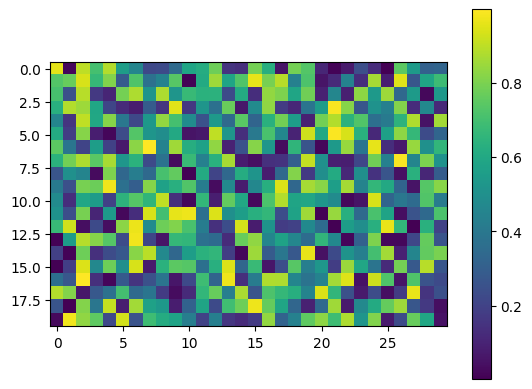

In [74]:
# you can use the matplotlib.pyplot package to visualize matrices.
import matplotlib.pyplot as plt

# Create a matrix containing random numbers.
M = np.random.random((20,30))

# plot the matrix
plt.imshow(M)
plt.colorbar()

In [75]:
# Generate a matrix containing random numbers
M = np.random.random((20,30))

# get the shape of a matrix
print(M.shape)
print()

# Get a specific component of a matrix in the 5th row and 6th column
print(M[5,6])
print()

# Get the 3rd column of a matrix
print(M[:,3])
print()

# Get the second row of a matrix
print(M[2,:])

(20, 30)

0.2861766394198725

[0.71941837 0.33695454 0.76435188 0.05307796 0.63603077 0.42086666
 0.26122926 0.10557344 0.54159152 0.52551683 0.1416927  0.99415922
 0.24712528 0.10580347 0.77821701 0.92990635 0.00367725 0.10436595
 0.53729012 0.18138441]

[0.83594783 0.24442713 0.68954323 0.76435188 0.23060914 0.24680427
 0.83777684 0.3321522  0.34046153 0.61856337 0.47614671 0.3858667
 0.48038292 0.66098147 0.87739163 0.57908179 0.57421698 0.4688301
 0.577494   0.8275146  0.14798039 0.0040744  0.57474501 0.20492469
 0.930872   0.48429181 0.54430818 0.40286495 0.33428374 0.70564001]


In [76]:
# Get the eigenvalues and eigenvectors of a matrix

M = np.array([[4,10],[13,2]])

eigvals,eigvecs = np.linalg.eig(M)

print(eigvals)
print()
# each column is an eigenvector each with norm ||v||=1
print(eigvecs)
print("Column vector norms:")
print(np.linalg.norm(eigvecs,axis=0))

[14.44552314 -8.44552314]

[[ 0.69153424 -0.62635812]
 [ 0.72234369  0.77953544]]
Column vector norms:
[1. 1.]


## Example Eigenfaces and Data Compression

Why bother with eigenvectors and eigenvalues?

Eigenvectors offer a convenient way to cluster data based on redundant information and compress the amount of storage needed for a data set by removing redundant information.

In the example, we will use the image of former US president George W. Bush represented as a matrix and then use eigenvectors to compress the image.

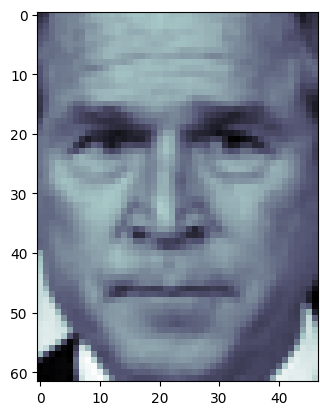

In [77]:
from sklearn import datasets
# Load faces data
faces = datasets.fetch_lfw_people(min_faces_per_person=60)
bush = faces.images[3]
plt.imshow(bush,cmap='bone');

But this object is also just a matrix containing numbers.

In [78]:
print(bush.shape)
bush

(62, 47)


array([[0.25882354, 0.30588236, 0.48496732, ..., 0.17908497, 0.26013073,
        0.28496733],
       [0.29803923, 0.36078432, 0.4928105 , ..., 0.20522876, 0.2535948 ,
        0.3019608 ],
       [0.34509805, 0.40522876, 0.48758173, ..., 0.26928106, 0.27189544,
        0.30849674],
       ...,
       [0.0875817 , 0.09934641, 0.09803922, ..., 0.8849673 , 0.87973857,
        0.86797386],
       [0.08888889, 0.1006536 , 0.09803922, ..., 0.89803916, 0.88104576,
        0.84705883],
       [0.08366013, 0.08627451, 0.09281046, ..., 0.90326804, 0.8862745 ,
        0.8026144 ]], dtype=float32)

**Principal Component Analysis (PCA)** uses matrix eigenvectors to capture the prevailing patterns in the matrix and then compress the matrix into a smaller matrix.

You will learn more about PCA in the machine learning course.

PCA identifies the axes (i.e., the dimensions) along which the variation in the data is maximum. These axes are the eigenvectors, and they’re orthogonal to each other.

Each eigenvector has a corresponding eigenvalue, which indicates the amount of variance in the data along the corresponding eigenvector/axis.

The eigenvector with the highest eigenvalue is the first principal component since it captures the maximum variance in the data. This is followed by the second principal component (the eigenvector with the second-highest eigenvalue) and so on.

In [79]:
from sklearn.decomposition import PCA

def compressBush(n=2):
    # Fit and Transform the flattened image using PCA
#     pca = PCA(1-compressionFactor) # Set the variance to be preserved
    pca = PCA(n_components=n) # Set the variance to be preserved
    pca.fit(bush)
#     print(pca.n_components_.shape)
    bush_transformed = pca.transform(bush)


    # Recover the compressed image
    bush_reconstructed = pca.inverse_transform(bush_transformed)
    bush_reconstructed = bush_reconstructed
#     .reshape(bush.shape)

    h,w = bush_transformed.shape
    a,b = bush.shape
    compression = 100*h*w/ (a*b)
    print("Original image is %d-by-%d" % bush.shape)
    print("Using %d eigenvectors, we compress the original matrix to be a %d-by-%d matrix" % (n,h,w))
    print("The compressed matrix is only %d%% as large as the original matrix." % compression)

    # Plot the original and the compressed image for comparison
    plt.figure(figsize=(10,8))

    plt.subplot(1,2,1)
    plt.imshow(bush, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1,2,2)
    plt.imshow(bush_reconstructed, cmap='gray')
    plt.title('Compressed Image')

In [80]:
widgets.interact(compressBush,n=(1,20,1));

interactive(children=(IntSlider(value=2, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…